In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x_data_years = np.arange(1994,2023)

In [3]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


In [4]:
# data_dir = 'C:/Users/leonh/Desktop/Praktikum_AWI/GVN/data/GVN_cont-meteo_1982-etseq/datasets/'
# df_all = pd.DataFrame()
# # Erstellen Sie eine leere Liste, um DataFrames zu speichern
# #years = []



# #Schleife für die Monate
# for year in range(1983,2022):
#     dataframes = []
#     for month in range(1, 13):
#         file = f'GVN_cont_meteorology_{year}-{month:02d}.tab'
#         filename = data_dir + file

#         comment_lines = 0
#         with open(filename, 'r') as file:
#             for line in file:
#                 if line.startswith('*/'):
#                     break
#                 comment_lines += 1
#         # Erzeugen des Dateinamens
        

#         # Lesen der CSV-Datei für den aktuellen Monat
#         df = pd.read_csv(filename,  skiprows=comment_lines+1,sep='\t')
        
#         df['Date/Time'] = pd.to_datetime(df['Date/Time'])
#         # print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
#         # df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = np.nanmean(df['T2 [°C] (average, Thermometer)'])
#         df_all = pd.concat((df_all, df), ignore_index= True)
#         # Fügen Sie den DataFrame zur Liste hinzu
#         #dataframes.append(df)
#     #years.append(dataframes.copy())







In [5]:
#df_backup = df_all.copy()


In [6]:
# df_all = df_backup.copy()

In [7]:
# df_all = df_all.drop(['SWU [W/m**2] (average, Pyranometer)', 'LWD [W/m**2] (average)'], axis= 1)


In [8]:
# df_all = df_all.drop(['Height [m]','SWD [W/m**2] (average, Pyranometer)', 'LWU [W/m**2] (average)', 'LWD [W/m**2]', 'LWU [W/m**2]', 'SWD OG1 [W/m**2] (average, Pyranometer)',
#        'SWD RG8 [W/m**2] (average, Pyranometer)',
#        'LWD [W/m**2] (average, Pyrgeometer)',
#        'LWU [W/m**2] (average, Pyrgeometer)',   'UV rad [W/m**2] (average, Total Ultraviolet Ra...)','SWD OG1 [W/m**2]', 'SWD RG8 [W/m**2]', 'UV rad [W/m**2]','SSD [min] (Instantaneous value at end of...)',
#        'T10 [°C] (1-min average, Thermometer, T...)',
#        'DD10 [deg] (1-min average, Anemometer, Th...)',
#        'FF10 [m/s] (1-min average, Anemometer, Th...)','DD2 [deg] (1-min average, Anemometer, Th...)',
#        'DIF [W/m**2] (average, Pyranometer)','DD10 [deg]'], axis= 1)


In [9]:
# print(df_all.columns)
# df_all = df_all.drop(['DD2 [deg]',  'SWD OG1 [W/m**2] (1-min average, Pyranometer, E...)',
#        'SWD RG8 [W/m**2] (1-min average, Pyranometer, E...)', 'LWD [W/m**2] (1-min average, Pyrgeometer, K...)', 'LWD [W/m**2] (1-min average; Sensor changed...)',
#        'DD10 [deg] (average, Anemometer)', 'FF10 [m/s] (average, Anemometer)',
#         'SWD [W/m**2]', 'SWU [W/m**2]','CBH [m] (minimum 30000: no clouds dete...)','UV rad [W/m**2] (1-min average, Total Ultravio...)','T10 [°C] (average, Thermometer)','T10 [°C]'], axis= 1)

# len(df_all.columns)

In [10]:
# # 
# columns_to_average = [
#     'PoPoPoPo [hPa]',
#     'PoPoPoPo [hPa] (average, Barometer)',
#     'PoPoPoPo [hPa] (Barometer, Paroscientific, Di...)',
#     'PoPoPoPo [hPa] (1-min average; Sensor changed...)',
#     'PoPoPoPo [hPa] (1-min average, redundant meas...)',
#     'PoPoPoPo [hPa] (1-min average, redundant meas...).1',
#     'PoPoPoPo [hPa] (1-min average, Barometer, Par...)'
# ]

# # Calculate the row-wise mean for the selected columns
# df_all['PoPoPoPo'] = np.nanmean(df_all[columns_to_average], axis=1)

# df_all = df_all.drop(['PoPoPoPo [hPa]', 'PoPoPoPo [hPa] (average, Barometer)','PoPoPoPo [hPa] (Barometer, Paroscientific, Di...)', 'PoPoPoPo [hPa] (1-min average; Sensor changed...)',
#                                   'PoPoPoPo [hPa] (1-min average, redundant meas...)', 'PoPoPoPo [hPa] (1-min average, redundant meas...).1', 'PoPoPoPo [hPa] (1-min average, Barometer, Par...)'], axis = 1)

In [11]:

# columns_to_average = [
#     'FF2 [m/s] (1-min average, Anemometer, Th...)',
#     'FF2 [m/s] (average, Anemometer)',
#     'FF2 [m/s]'
# ]

# # Calculate the row-wise mean for the selected columns
# df_all['FF2 [m/s]'] = np.nanmean(df_all[columns_to_average], axis=1)

# df_all = df_all.drop([
#     'FF2 [m/s] (1-min average, Anemometer, Th...)',
#     'FF2 [m/s] (average, Anemometer)'], axis = 1)

In [12]:
# df_all['RH [%]'] = np.nanmean(df_all[['RH [%]','RH [%] (average, redundant measuremen...)','RH [%] (average, redundant measuremen...).1','RH [%] (1-min average, redundant meas...)', 'RH [%] (1-min average, redundant meas...).1','RH [%] (nominal mounting height: 2m, ...)', 'RH [%] (nominal mounting height: 2m, ...).1','RH [%] (nominal mounting height: 10m,...)','RH [%] (nominal mounting height: 10m,...).1']], axis = 1)

# df_all = df_all.drop(['RH [%] (average, redundant measuremen...)','RH [%] (average, redundant measuremen...).1','RH [%] (1-min average, redundant meas...)', 'RH [%] (1-min average, redundant meas...).1','RH [%] (nominal mounting height: 2m, ...)', 'RH [%] (nominal mounting height: 2m, ...).1','RH [%] (nominal mounting height: 10m,...)','RH [%] (nominal mounting height: 10m,...).1'], axis = 1)

In [13]:
# # df_all.columns
# # df_all['T2'] = np.nanmean(df_all.loc[['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)']], axis = 1)


# # Specify the list of column names to average
# columns_to_average = [
#     'T2 [°C] (average, Thermometer)',
#     'T2 [°C]',
#     'T2 [°C] (1-min average, Thermometer, T...)',
#     'T2 [°C] (1-min average; Sensor changed...)'
# ]

# # Calculate the row-wise mean for the selected columns
# df_all['T2'] = np.nanmean(df_all[columns_to_average], axis=1)


# df_all = df_all.drop(['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C]','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)'], axis = 1)

In [14]:
# df_all = df_all.drop(['SSD [min]','FF10 [m/s]','SSD [min] (average)'], axis = 'columns')

In [15]:
# df_all.to_csv('df_all_GVN.csv')
df_all = pd.read_csv('df_all_GVN.csv')
df_all['Date/Time'] = pd.to_datetime(df_all['Date/Time'])

In [16]:
# import datetime 
# # Create an empty DataFrame for monthly aggregation
# df_days = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'RH', 'Pres'])

# for year in range(1983, 2022):
#     for month in range(1, 13):
#         for day in range(1,29):
#             start_date = pd.to_datetime(f'{year}-{month:02d}')
#             # if month < 12:
#             #     end_date = pd.to_datetime(f'{year}-{month+1:02d}')
#             # else:
#             #     end_date = pd.to_datetime(f'{year+1}-01')

#             # Filter the data for the current month
#             filtered_data_day = df_all[(df_all['Date/Time'] >=  start_date+ datetime.timedelta(days=day-1)) & (df_all['Date/Time'] < start_date+ datetime.timedelta(days=day))]


#             day_min = np.min(filtered_data_day['T2'])
#             day_max = np.max(filtered_data_day['T2'])
 

           
#             # Calculate the mean for each column in the filtered data
#             temp_T2 = np.nanmean(filtered_data_day['T2'])
#             temp_RH = np.nanmean(filtered_data_day['RH'])
#             temp_Pres = np.nanmean(filtered_data_day['PoPoPoPo'])

#             temp_df = pd.DataFrame({'Date':[start_date+ datetime.timedelta(days=day-1)], 'T2Avg': [temp_T2], 'T2Min': [day_min], 'T2Max': [day_max], 'RH':[temp_RH], 'Pres': [temp_Pres]})
#             df_days = pd.concat([df_days, temp_df], ignore_index= True)




In [17]:
df_all.columns

Index(['Unnamed: 0', 'Date/Time', 'FF2 [m/s]', 'RH [%]', 'PoPoPoPo', 'T2'], dtype='object')

In [18]:
import datetime

# Group by date and calculate means for each column
df_all['Date'] = pd.to_datetime(df_all['Date/Time']).dt.date
agg_functions = {
    'T2': ['mean', 'min', 'max'],
    'RH [%]': 'mean',
    'PoPoPoPo': 'mean',
#    'SSD [min] (average)': 'mean',
    'FF2 [m/s]': 'mean'
}
df_days = df_all.groupby('Date').agg(agg_functions).reset_index()

# # Calculate DTR
# df_days['DTR'] = df_days['T2']['max'] - df_days['T2']['min']

# Rename columns for readability
df_days.columns = ['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]', 'Pres [hPa]',  'FF2 [m/s]']

# Convert Date column to datetime type
df_days['Date'] = pd.to_datetime(df_days['Date'])

# Filter the date range if needed (optional)
# df_days = df_days[(df_days['Date'] >= '1983-01-01') & (df_days['Date'] <= '2021-12-31')]

df_days['DTR [°C]'] = df_days['T2Max [°C]'] - df_days['T2Min [°C]']

In [19]:
df_days.columns

Index(['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]',
       'Pres [hPa]', 'FF2 [m/s]', 'DTR [°C]'],
      dtype='object')

In [20]:
df_temp = df_days.copy()
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Set the 'Date' column as the index
df_temp.set_index('Date', inplace=True)

# Resample the data to monthly intervals and calculate means for each column
df_monthly = df_temp.resample('M').mean().reset_index()

# Rename columns for readability (if needed)
df_monthly.columns = ['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]', 'Pres [hPa]',  'FF2 [m/s]', 'DTR [°C]']

# Reset the 'Date' column to the original format (optional)
df_monthly['Date'] = df_monthly['Date'].dt.strftime('%Y-%m-%d')

# Print or save the new dataframe df_monthly


In [21]:
df_days.columns

Index(['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]',
       'Pres [hPa]', 'FF2 [m/s]', 'DTR [°C]'],
      dtype='object')

In [22]:
# import pandas as pd
# import numpy as np
# import datetime

# # Create an empty DataFrame for daily aggregation
# df_days = pd.DataFrame(columns=['Date', 'T2Avg', 'T2Min', 'T2Max', 'RH', 'Pres'])

# # Extract year and month from the Date/Time column
# df_all['Year'] = df_all['Date/Time'].dt.year
# df_all['Month'] = df_all['Date/Time'].dt.month
# df_all['Day'] = df_all['Date/Time'].dt.day

# # Loop through the years, months, and days
# for year in range(1983, 2022):
#     for month in range(1, 13):
#         for day in range(1, 29):
#             # Filter the data for the current year, month, and day
#             filtered_data_day = df_all[(df_all['Year'] == year) & (df_all['Month'] == month) & (df_all['Day'] == day)]
            
#             if not filtered_data_day.empty:
#                 # Calculate the mean for each column in the filtered data
#                 temp_T2_avg = filtered_data_day['T2'].mean()
#                 temp_T2_min = filtered_data_day['T2'].min()
#                 temp_T2_max = filtered_data_day['T2'].max()
#                 temp_RH = filtered_data_day['RH'].mean()
#                 temp_Pres = filtered_data_day['PoPoPoPo'].mean()
                
#                 # Calculate the date for the current day
#                 date = datetime.date(year, month, day)
                
#                 # Append the aggregated values to df_days
#                 df_days = df_days.append({'Date': date, 'T2Avg': temp_T2_avg, 'T2Min': temp_T2_min, 'T2Max': temp_T2_max, 'RH': temp_RH, 'Pres': temp_Pres}, ignore_index=True)
#     print(str(year))

# # Convert Date column to datetime type (if needed)
# df_days['Date'] = pd.to_datetime(df_days['Date'])

# df_days['DTR'] = np.subtract(df_days['T2Max'], df_days['T2Min'])

## Daily scatter plots

In [23]:
# import seaborn as sns

# # Assuming you have already loaded and prepared the df_days DataFrame as shown in the previous response

# # Scatterplot matrix
# sns.set(style="ticks")
# sns.pairplot(df_days[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]', 'FF2 [m/s]']], diag_kind='kde') # 'T2Min [°C]', 'T2Max [°C]',
# plt.show()

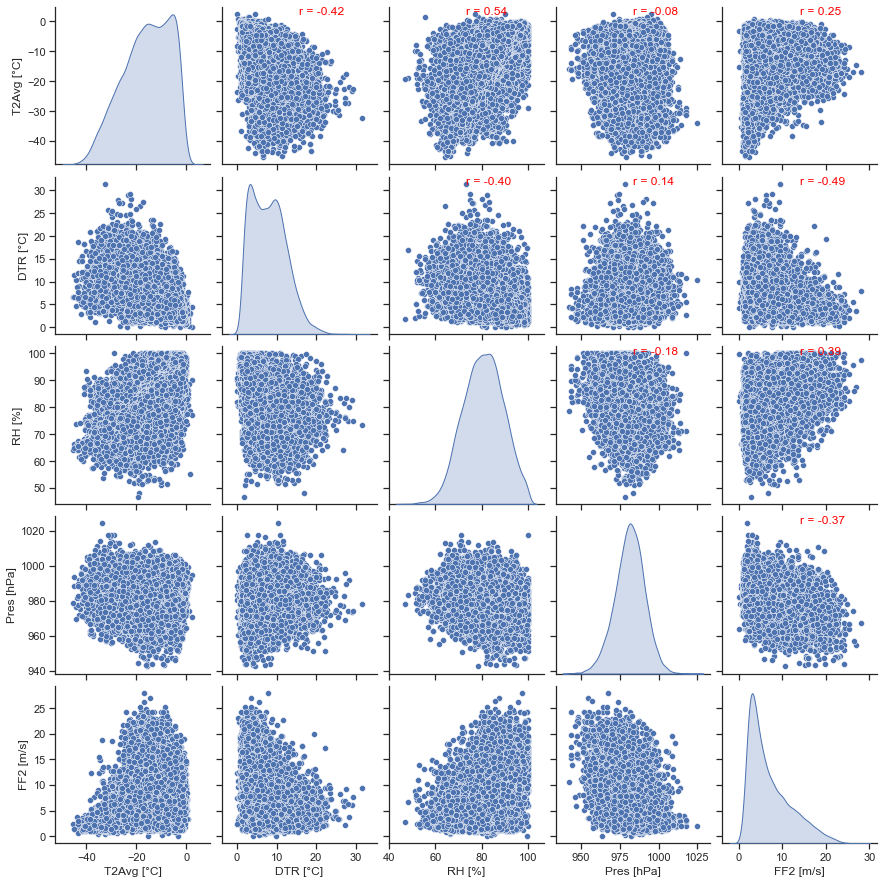

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# Assuming you have already loaded and prepared the df_days DataFrame as shown in the previous response

# Create a function to calculate and annotate correlations while ignoring NaN values
def calculate_and_annotate_correlation(x, y, **kwargs):
    valid_mask = ~np.logical_or(np.isnan(x), np.isnan(y))  # Create a mask for valid data points
    x_valid, y_valid = x[valid_mask], y[valid_mask]
    if len(x_valid) > 1:  # Check if there are enough valid data points for correlation
        corr_coef, _ = pearsonr(x_valid, y_valid)
        corr_text = f"r = {corr_coef:.2f}"
    else:
        corr_text = "r = NaN"
    ax = plt.gca()
    ax.annotate(corr_text, xy=(0.5, 0.95), xycoords=ax.transAxes, fontsize=12, color='red')

# Scatterplot matrix
sns.set(style="ticks")
g = sns.pairplot(df_days[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]',  'FF2 [m/s]']], diag_kind='kde')

# Annotate correlations while ignoring NaN entries
g.map_upper(calculate_and_annotate_correlation)


plt.savefig('GVN_correlation_days.png', dpi = 300)

plt.show()


In [25]:
df_days.columns

Index(['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]',
       'Pres [hPa]', 'FF2 [m/s]', 'DTR [°C]'],
      dtype='object')

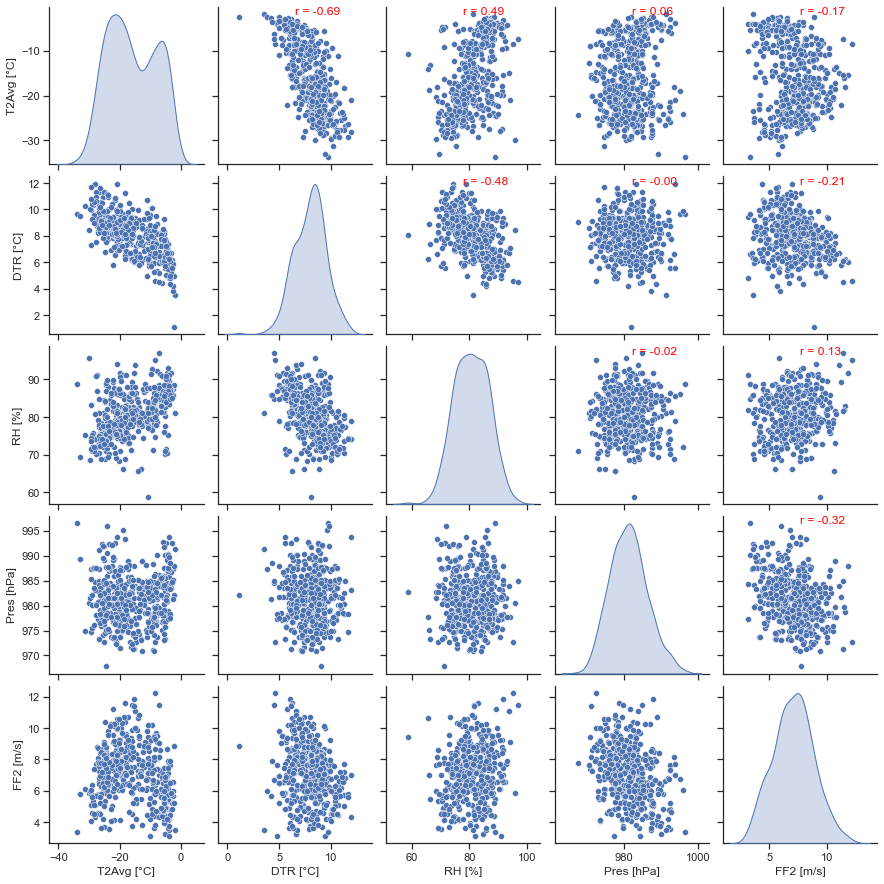

In [26]:
#df_days[# Create a function to calculate and annotate correlations while ignoring NaN values
def calculate_and_annotate_correlation(x, y, **kwargs):
    valid_mask = ~np.logical_or(np.isnan(x), np.isnan(y))  # Create a mask for valid data points
    x_valid, y_valid = x[valid_mask], y[valid_mask]
    if len(x_valid) > 1:  # Check if there are enough valid data points for correlation
        corr_coef, _ = pearsonr(x_valid, y_valid)
        corr_text = f"r = {corr_coef:.2f}"
    else:
        corr_text = "r = NaN"
    ax = plt.gca()
    ax.annotate(corr_text, xy=(0.5, 0.95), xycoords=ax.transAxes, fontsize=12, color='red')

# Scatterplot matrix
sns.set(style="ticks")
g = sns.pairplot(df_monthly[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]',  'FF2 [m/s]']], diag_kind='kde')

# Annotate correlations while ignoring NaN entries
g.map_upper(calculate_and_annotate_correlation)

#plt.savefig('GVN_correlation_month.png', dpi = 300)
plt.savefig

plt.show()

In [27]:
df_days.columns

Index(['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]',
       'Pres [hPa]', 'FF2 [m/s]', 'DTR [°C]'],
      dtype='object')

In [28]:
#df_days.to_csv('df_days_GVN.csv')
# df_days = pd.read_csv('df_days_GVN.csv')
# df_days['Date/Time'] = pd.to_datetime(df_days['Date/Time'])

### Creating monthly data

In [29]:
df_monthly['month'] = pd.to_datetime(df_monthly['Date']).dt.month

# Initialize an empty dictionary to store sub DataFrames by month
monthly_data = {}

# Loop through each unique month
for month in range(1, 13):
    # Filter the DataFrame to get data for the current month
    monthly_data[month] = df_monthly[df_monthly['month'] == month]

# Now, monthly_data is a dictionary where each key represents a month (1 to 12),
# and the corresponding value is a DataFrame containing data for that month.

In [30]:
df_days.columns

Index(['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]',
       'Pres [hPa]', 'FF2 [m/s]', 'DTR [°C]'],
      dtype='object')

In [31]:
df_days['month'] = pd.to_datetime(df_days['Date']).dt.month

# Initialize an empty dictionary to store sub DataFrames by month
monthly_data_days = {}

# Loop through each unique month
for month in range(1, 13):
    # Filter the DataFrame to get data for the current month
    monthly_data_days[month] = df_days[df_days['month'] == month]

# Now, monthly_data is a dictionary where each key represents a month (1 to 12),
# and the corresponding value is a DataFrame containing data for that month.

### Binning


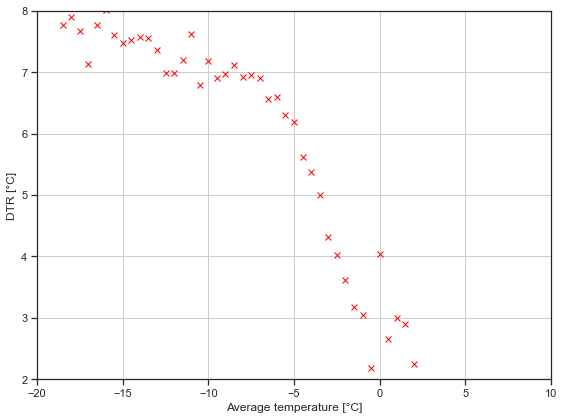

In [32]:
# Define the interval length 'd'
d = 0.5  # Adjust this value to your desired interval length

# Create bins for the 'x' values
df_days['bin'] = (df_days['T2Avg [°C]'] // d) * d

# Calculate the means of 'y' values in each bin
means_df = df_days.groupby('bin')['DTR [°C]'].mean().reset_index()

# Rename the columns for clarity
means_df.columns = ['TAvg_bin', 'DTR']

# Drop the 'bin' column if you don't need it
#means_df = means_df.drop(columns='bin')

# Print or use means_df as needed
plt.plot(means_df['TAvg_bin'], means_df['DTR'], marker = 'x', ls = '', color = 'red')

plt.xlabel('Average temperature [°C]')
plt.ylabel('DTR [°C]')

plt.grid()

plt.xlim(-20,10)
plt.ylim(2,8)

plt.tight_layout()

#plt.savefig('GVN_DTR_binning.png', dpi = 300)

(-12.0, -0.875)

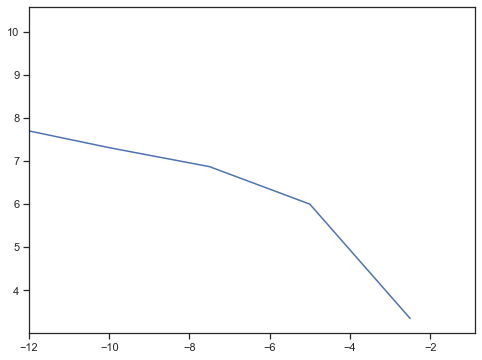

In [33]:
# Define the interval length 'd'
d = 2.5  # Adjust this value to your desired interval length

# Create bins for the 'x' values
df_monthly['bin'] = (df_monthly['T2Avg [°C]'] // d) * d

# Calculate the means of 'y' values in each bin
means_df_m = df_monthly.groupby('bin')['DTR [°C]'].mean().reset_index()

# Rename the columns for clarity
means_df_m.columns = ['TAvg_bin', 'DTR']

# Drop the 'bin' column if you don't need it
#means_df = means_df.drop(columns='bin')

# Print or use means_df as needed
plt.plot(means_df_m['TAvg_bin'], means_df_m['DTR'])

plt.xlim(-12,)

In [34]:
monthly_data_days[1]

,Date,T2Avg [°C],T2Min [°C],T2Max [°C],RH [%],Pres [hPa],FF2 [m/s],DTR [°C],month
0,1983-01-01,-2.617213,-5.8,-1.0,89.217213,993.166066,2.945082,4.8,1
1,1983-01-02,-2.702920,-3.7,-2.1,90.127737,996.182701,2.012409,1.6,1
2,1983-01-03,-3.121739,-4.9,-2.0,84.334783,994.433913,3.133043,2.9,1
3,1983-01-04,-4.756731,-9.1,-1.6,87.004808,993.219615,5.500000,7.5,1
4,1983-01-05,-3.698000,-6.1,-1.9,84.775000,996.854500,8.407000,4.2,1
...,...,...,...,...,...,...,...,...,...
13735,2021-01-27,-3.917500,-8.3,-1.4,89.804745,972.215854,1.950069,6.9,1
13736,2021-01-28,-5.394861,-12.8,0.4,86.660394,974.441097,1.956944,13.2,1
13737,2021-01-29,-5.937708,-10.2,-2.2,89.113449,976.041431,4.864306,8.0,1
13738,2021-01-30,-7.938125,-13.1,-3.6,82.517153,982.409812,2.211667,9.5,1


In [39]:
df_years = pd.DataFrame(columns= ['Date', 'T2Avg', 'T2Min', 'T2Max', 'DTR', 'RH', 'Pres'])

df_monthly['Date'] = pd.to_datetime(df_monthly['Date'])

for year in range(1983,2022):
        start_date = pd.to_datetime(f'{year}-01')
        end_date = pd.to_datetime(f'{year+1}-01')

        # Filter the data for the current month
        filtered_data = df_monthly[(df_monthly['Date'] >= start_date) & (df_monthly['Date'] < end_date)]




        day_max_mean = np.nanmean(filtered_data['T2Max [°C]'])
        day_min_mean = np.nanmean(filtered_data['T2Min [°C]'])
        temp_DTR = np.nanmean(filtered_data['DTR [°C]'])
        # Calculate the mean for each column in the filtered data
        temp_T2 = np.nanmean(filtered_data['T2Avg [°C]'])
        temp_RH = np.nanmean(filtered_data['RH [%]'])
        temp_Pres = np.nanmean(filtered_data['Pres [hPa]'])
        
        temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg': [temp_T2], 'T2Min': [day_min_mean], 'T2Max': [day_max_mean],'DTR': [temp_DTR], 'RH':[temp_RH], 'Pres': [temp_Pres]})
        df_years = pd.concat([df_years, temp_df], ignore_index= True)

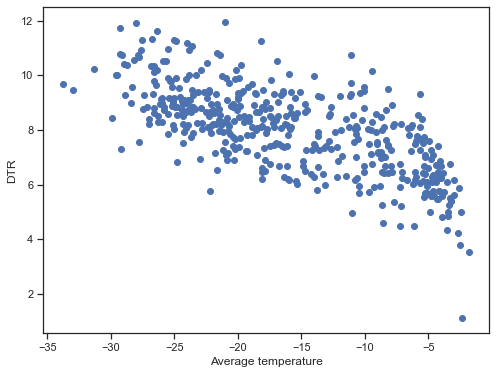

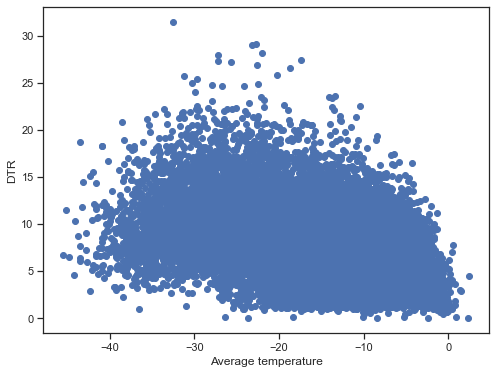

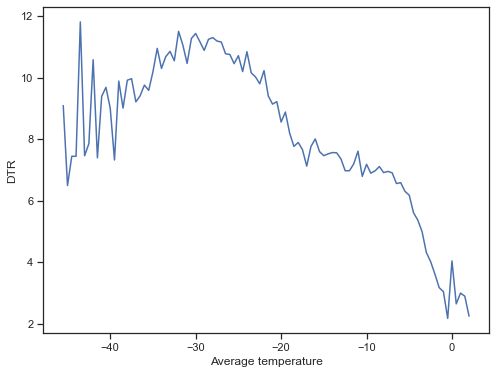

In [41]:
plt.scatter(df_monthly['T2Avg [°C]'], df_monthly['DTR [°C]'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')

# plt.savefig('GVN_T2Avg_DTR.png', dpi = 300)

plt.show()

plt.scatter(df_days['T2Avg [°C]'], df_days['DTR [°C]'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')

# plt.savefig('GVN_T2Avg_DTR.png', dpi = 300)

plt.show()

plt.plot(means_df['TAvg_bin'], means_df['DTR'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')

# plt.savefig('GVN_T2Avg_DTR.png', dpi = 300)

plt.show()



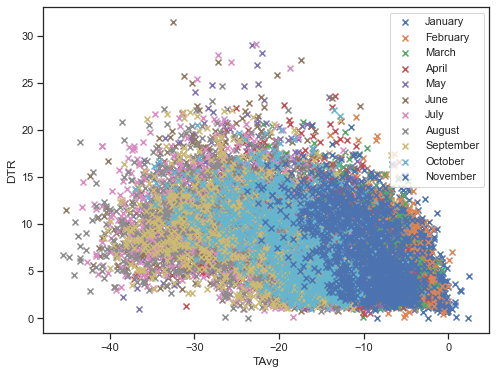

In [42]:


for i in range(1,12):
    plt.scatter(monthly_data_days[i]['T2Avg [°C]'], monthly_data_days[i]['DTR [°C]'], marker = 'x', alpha = 1, label = month_label[i-1])

plt.xlabel('TAvg')
plt.ylabel('DTR')

plt.legend()

In [43]:
# plt.scatter(df_month['T2Min'], df_month['DTR'])

# plt.xlabel('Min temperature')
# plt.ylabel('DTR')


# plt.show()

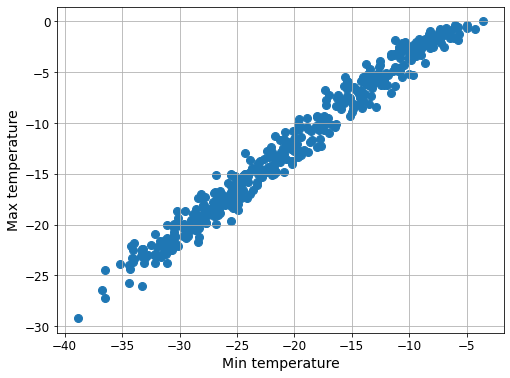

In [ ]:
plt.scatter(df_month['T2Min'], df_month['T2Max'])

plt.xlabel('Min temperature')
plt.ylabel('Max temperature')


plt.show()

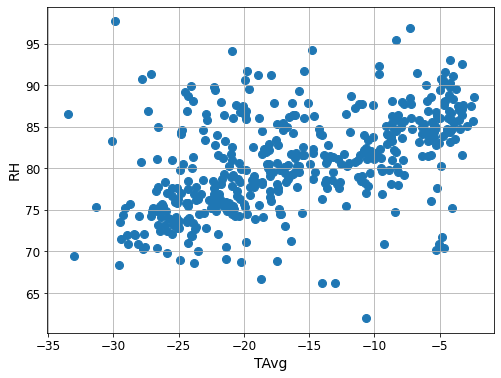

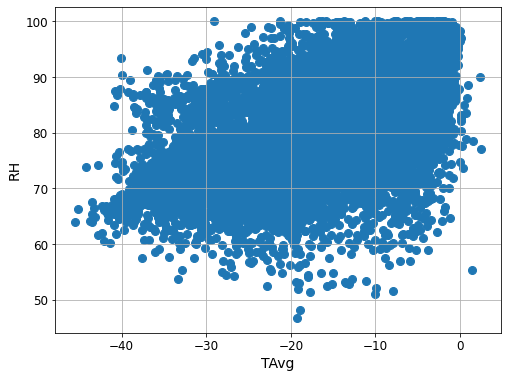

In [ ]:
plt.scatter( df_month['T2Avg'], df_month['RH'],)

plt.ylabel('RH')
plt.xlabel('TAvg')

plt.show()


plt.scatter( df_days['T2Avg'], df_days['RH'],)

plt.ylabel('RH')
plt.xlabel('TAvg')

plt.show()


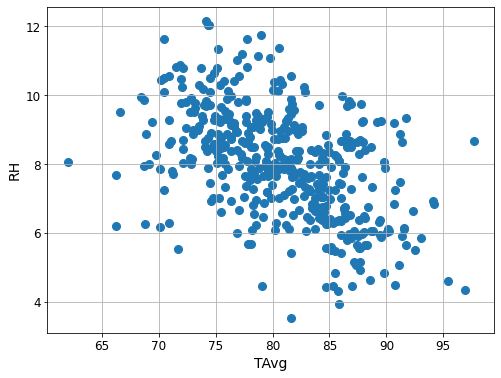

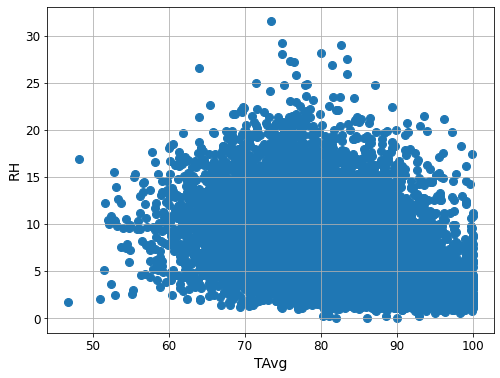

In [ ]:
plt.scatter( df_month['RH'], df_month['DTR'],)

plt.ylabel('RH')
plt.xlabel('TAvg')

plt.show()


plt.scatter( df_days['RH'], df_days['DTR'],)

plt.ylabel('RH')
plt.xlabel('TAvg')

plt.show()


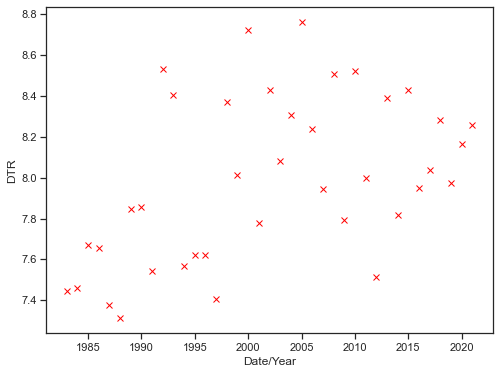

In [45]:
plt.plot(df_years['Date'], df_years['DTR'], ls = '', marker = 'x', color = 'red')

plt.xlabel('Date/Year')
plt.ylabel('DTR')

plt.savefig('GVN_Date_DTR.png', dpi = 300)

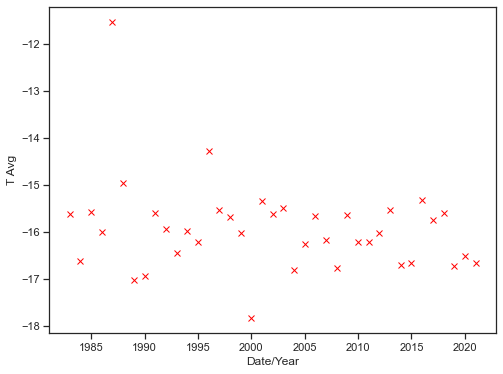

In [46]:
plt.plot(df_years['Date'], df_years['T2Avg'],ls = '', marker = 'x', color = 'red')

plt.xlabel('Date/Year')
plt.ylabel('T Avg')

plt.savefig('GVN_Date_T2Avg.png', dpi = 300)
